In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re

In [2]:
cifar10_labels = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

In [3]:
def show_attack_examples(assets_root="assets/"):
    pattern = re.compile(r"^eps_\d*\.?\d+_delta_\d*\.?\d+_iters_\d+$")
    eps_dirs = sorted([d for d in os.listdir(assets_root) if pattern.match(d)])

    if not eps_dirs:
        print("Aucun dossier eps_*_delta_*_iters_* trouvé dans assets/")
        return

    for d in eps_dirs:
        eps_path = os.path.join(assets_root, d)
        clean_files = sorted([f for f in os.listdir(eps_path) if "clean" in f])
        adv_files   = sorted([f for f in os.listdir(eps_path) if "adv"   in f])

        if not clean_files:
            print(f"(vide) {eps_path}")
            continue

        # Extract PGD parameters from directory name
        match = re.match(r"eps_([0-9.]+)_delta_([0-9.]+)_iters_([0-9]+)", d)
        if match:
            epsilon, delta, iters = match.groups()
            print(f"\n=== ε = {epsilon} | δ = {delta} | iters = {iters} ===")
        else:
            print(f"\n=== {d} ===")

        clean_f = clean_files[0]
        adv_f   = adv_files[0]

        clean_path = os.path.join(eps_path, clean_f)
        adv_path   = os.path.join(eps_path, adv_f)

        clean_img = mpimg.imread(clean_path)
        adv_img   = mpimg.imread(adv_path)

        clean_pred = int(clean_f.split("pred_")[1].split(".")[0])
        adv_pred   = int(adv_f.split("pred_")[1].split(".")[0])

        clean_name = cifar10_labels[clean_pred]
        adv_name   = cifar10_labels[adv_pred]

        fig, ax = plt.subplots(1, 2, figsize=(11, 4))

        ax[0].imshow(clean_img)
        ax[0].set_title(f"Clean\nPred: {clean_pred} ({clean_name})", fontsize=12)
        ax[0].axis("off")

        ax[1].imshow(adv_img)
        ax[1].set_title(f"Adversarial\nPred: {adv_pred} ({adv_name})", fontsize=12)
        ax[1].axis("off")

        plt.suptitle(f"PGD Attack Visualization — ε = {epsilon} | δ = {delta} | iters = {iters}", fontsize=15) if match else plt.suptitle(f"PGD Attack Visualization — {d}", fontsize=15)
        plt.tight_layout()
        plt.show()


=== ε = 0.01 | δ = 0.01 | iters = 40 ===


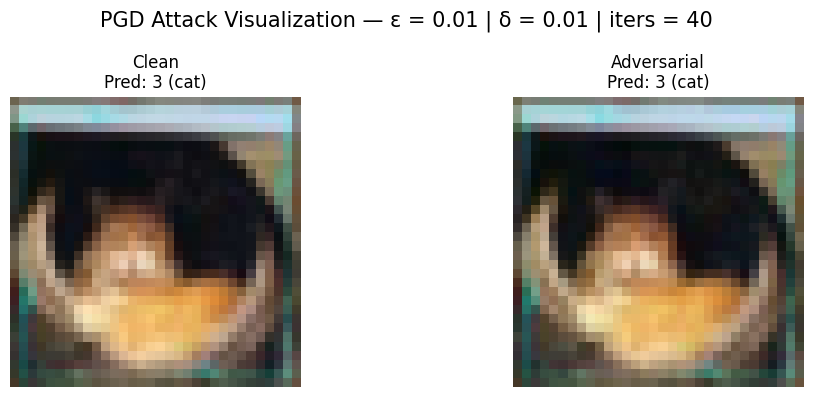


=== ε = 0.01 | δ = 0.02 | iters = 40 ===


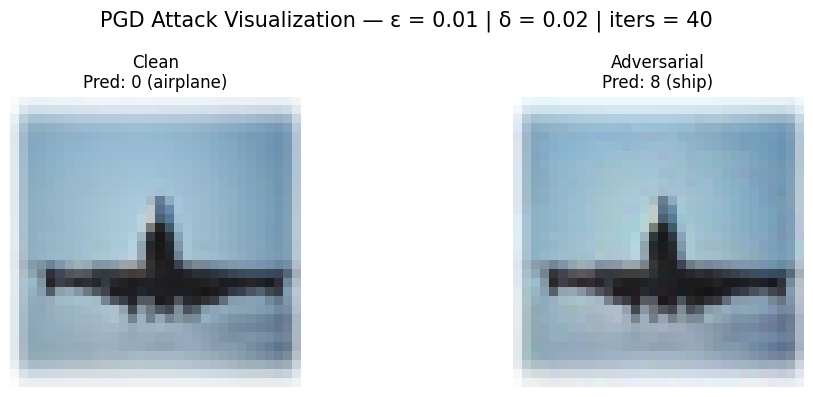


=== ε = 0.02 | δ = 0.01 | iters = 40 ===


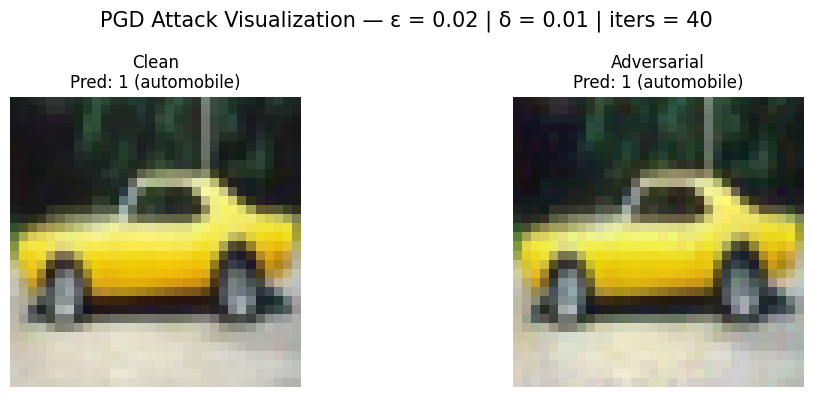


=== ε = 0.02 | δ = 0.02 | iters = 40 ===


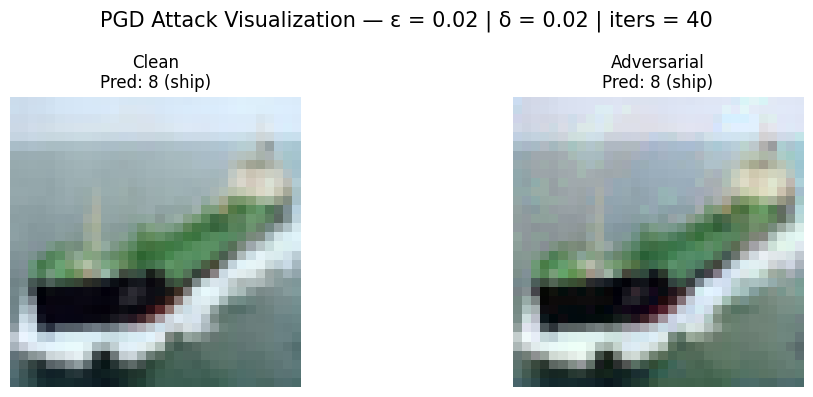


=== ε = 0.03 | δ = 0.01 | iters = 40 ===


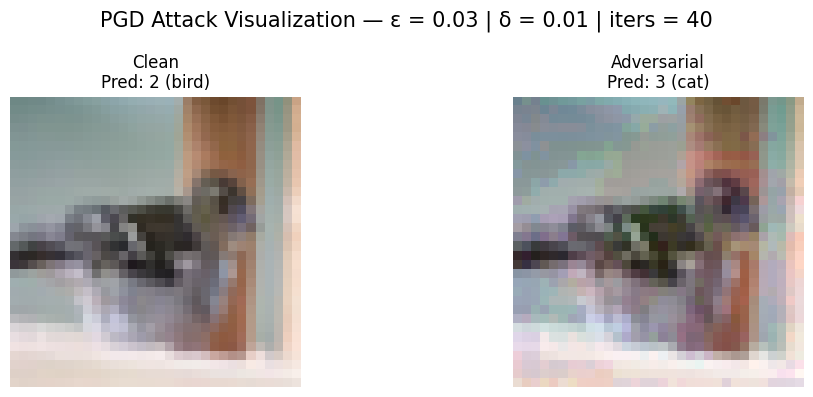


=== ε = 0.03 | δ = 0.02 | iters = 40 ===


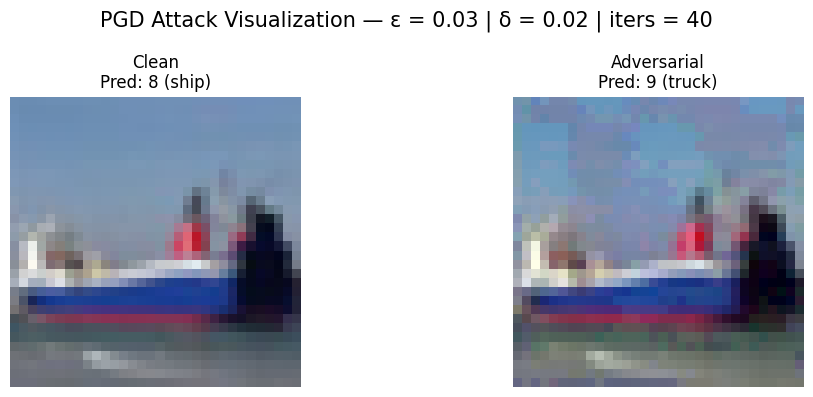


=== ε = 0.04 | δ = 0.01 | iters = 40 ===


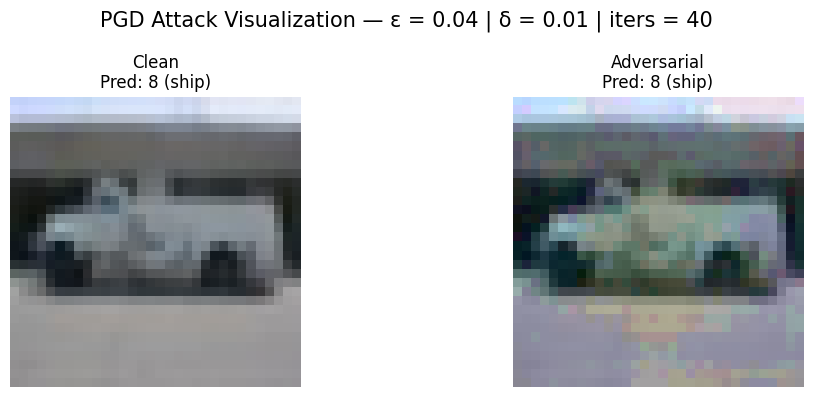


=== ε = 0.04 | δ = 0.02 | iters = 40 ===


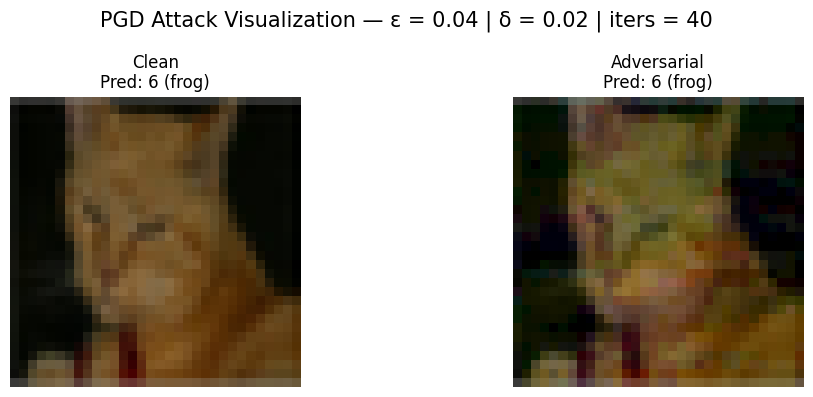


=== ε = 0.05 | δ = 0.01 | iters = 40 ===


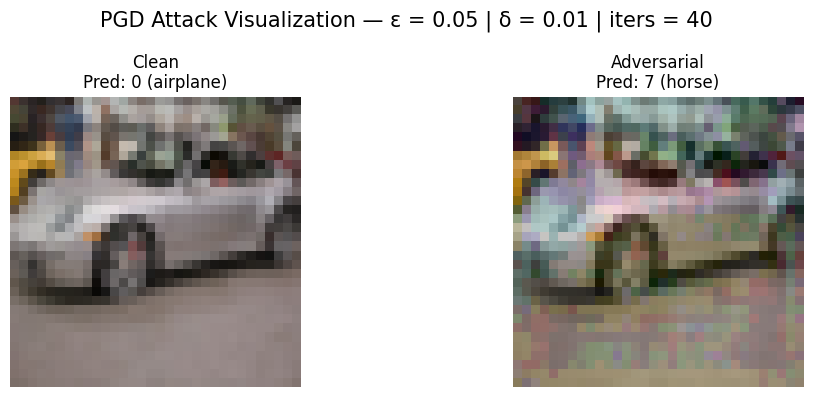


=== ε = 0.05 | δ = 0.02 | iters = 40 ===


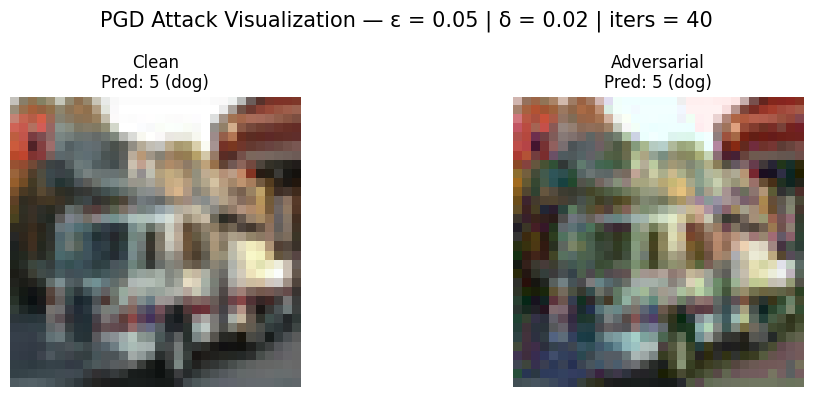


=== ε = 0.1 | δ = 0.01 | iters = 40 ===


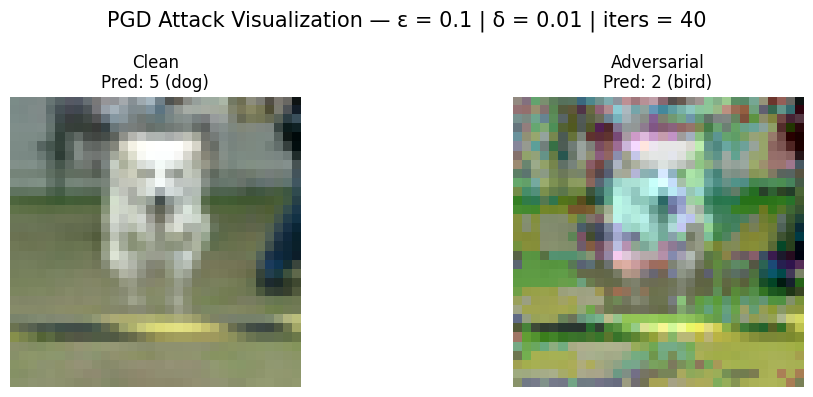


=== ε = 0.1 | δ = 0.02 | iters = 40 ===


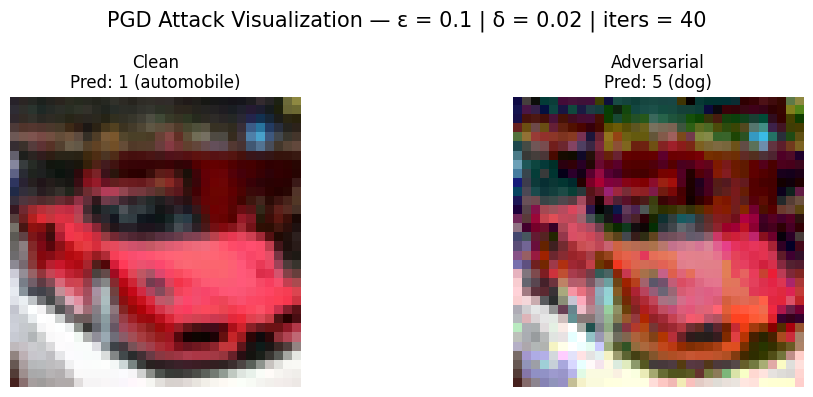

In [4]:
show_attack_examples("assets/")